In [1]:
import xarray as xr
import numpy as np

In [2]:
data_1 = xr.DataArray(
    np.random.normal(
        size=(365, 180)
    ),
    dims=("t", "lat")
)
data_1

<xarray.DataArray (t: 365, lat: 180)>
array([[ 0.81240834, -0.617653  ,  1.35539738, ..., -1.53976492,
         0.52846018, -0.24313504],
       [-0.04012264,  0.93452233, -0.20204898, ...,  0.73937157,
         0.50208288, -0.5808454 ],
       [ 0.73808333, -0.05603209, -0.77994373, ..., -0.74661494,
         1.92544109,  0.90251083],
       ...,
       [ 0.02144742,  0.26635794, -1.32896049, ..., -0.49620781,
         0.61725458, -0.55123549],
       [ 0.75460848, -0.39465906,  0.18065256, ..., -0.96827038,
         1.26539429,  0.23443818],
       [ 1.70576278, -0.57203735, -1.12017944, ..., -0.31302545,
         1.6033716 , -0.04455335]])
Dimensions without coordinates: t, lat

In [3]:
data_2 = xr.DataArray(
    np.random.normal(
        size=(365, 360)
    ),
    dims=("t", "lon")
)
data_2

<xarray.DataArray (t: 365, lon: 360)>
array([[ 5.76268966e-01, -1.03471365e+00, -1.75065063e-01, ...,
        -9.84205521e-02, -1.31172519e+00, -1.59976145e+00],
       [-1.54293849e+00,  2.94201037e-01,  1.13440749e-03, ...,
        -2.39549138e+00,  1.16570473e+00,  1.78745819e+00],
       [-1.38573813e+00,  6.60631974e-01,  7.19882820e-01, ...,
        -1.23787575e-01,  1.47026102e+00, -6.88922745e-01],
       ...,
       [ 3.84846149e-01,  3.17286604e-01,  3.76423390e-03, ...,
        -4.40717018e-01,  2.37589678e-01, -1.35898217e+00],
       [ 9.60218399e-02,  1.03510547e+00, -6.40223951e-01, ...,
         6.45019355e-01,  4.68780660e-01, -6.99046602e-01],
       [-2.06379335e-02,  1.91652477e+00, -1.79089820e+00, ...,
         1.23338117e+00,  8.43460572e-01,  5.31277431e-01]])
Dimensions without coordinates: t, lon

$$corr(x, y) = \overline{(x-\overline{x})(y-\overline{y})}$$
$$corr(x, y) = \overline{x \cdot y} - \overline{x} \cdot \overline{y}$$

In [5]:
def corr(d1, d2):
    return (d1 * d2).mean("t") - d1.mean("t") * d2.mean("t")

In [9]:
def corr_alt(d1, d2):
    d1prime = d1 - d1.mean("t")
    d2prime = d2 - d2.mean("t")
    return (d1prime * d2prime).mean("t")

In [8]:
corr(data_1, data_2).std() * (365 ** 0.5)

<xarray.DataArray ()>
array(1.00168887)

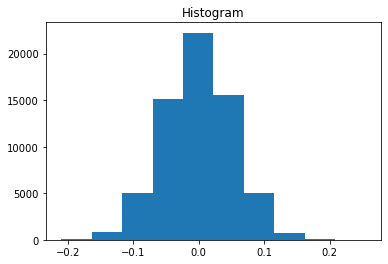

In [7]:
corr(data_1, data_2).plot.hist();

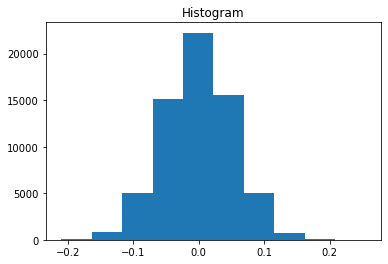

In [10]:
corr_alt(data_1, data_2).plot.hist();

In [19]:
def cant_use_nan(x):
    if any(np.isnan(x)).sum() > 0:
        raise ValueError

In [21]:
x = 0 / np.arange(10)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [23]:
np.isnan(x)

array([ True, False, False, False, False, False, False, False, False,
       False])

In [15]:
def can_use_nan(x):
    cant_use_nan(x[x != np.NaN])